In [1]:
%autoreload 2

In [41]:
import ajc
import numpy as np
import matplotlib.pyplot as plt

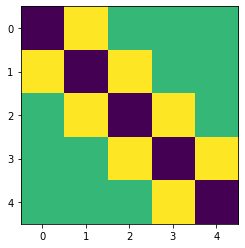

In [42]:
def simpleq(n):
    Q = np.zeros((n,n))
    np.fill_diagonal(Q[1:,:], 1)
    np.fill_diagonal(Q[:,1:], 1)
    np.fill_diagonal(Q, -2)
    return Q

plt.imshow(simpleq(5))

In [283]:
nx = 3
nt = 3
dt = 0.5

dts = np.array([dt for i in range(nt)])
dts[-1] = 100000
Qs = np.dstack([simpleq(nx) for i in range(nt)])

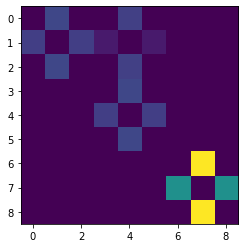

In [324]:
j1 = ajc.AJCGalerkin(Qs, dts)
plt.imshow(j1.km)

In [285]:
np.sum(j1.km, axis=1)

array([0.40086519, 0.51487538, 0.40086519, 0.21306132, 0.36787944,
       0.21306132, 0.99999   , 0.999995  , 0.99999   ])

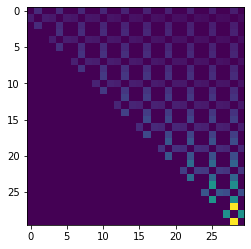

In [165]:
qt, qi = ajc.qtilde(Qs) # qt_ijt, qi_it
S = ajc.holding_probs(qi, dts) # S_ist
j2 = ajc.AJCCollocation(Qs, S)
plt.imshow(j2.km)

In [304]:
s

array([0.19065176, 0.27669371, 0.73684964, 0.42732853, 0.19415419])

In [321]:
s=1/(np.arange(5)+1)
k=0
np.insert(np.cumprod(s[k+1:-1]), 0, 1)

array([1.        , 0.5       , 0.16666667, 0.04166667])

In [322]:
s

array([1.        , 0.5       , 0.33333333, 0.25      , 0.2       ])